# Лабораторные работы по дисциплине "Методы, средства и технологии мультимедиа"

**Выполнила студентка гр. М8О-406Б-21 Волошинская Евгения Владимировна**

В качестве данных я выбрала датасет Loan Approval Classification Dataset (https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data/data). Эти данные могут быть использованы для обучения моделей ИИ, которые автоматизируют процесс одобрения кредитов, оценивают кредитный риск, выявляют важные факторы при принятии решений, обнаруживают потенциальное мошенничество и персонализируют кредитные предложения. Это помогает финансовым учреждениям повысить эффективность, уменьшить ручную работу, принимать более обоснованные решения при обработке кредитных заявок и улучшать клиентский опыт.

Данные подходят как для задачи классификации, так и для регрессии.

Для задачи классификации (предсказание одобрения займа): т.к. классы не сбалансированы, то основные метрики качества для сравнения моделей - Precision, Recall, F1-мера, но также рассчитаны и точность, и матрица ошибок, полнота и AUC.

Для задачи регрессии (расчет процентной ставки по займу):
MSE, MAE, MAPE и R2

## Лабораторная работа №2: Проведение исследований с логистической и линейной регрессией

Импортируем необходимые библиотеки:

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, roc_auc_score, mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OrdinalEncoder

import warnings
warnings.filterwarnings("ignore")

In [8]:
df = pd.read_csv("loan_data.csv")
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [ ]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


###Линейная регрессия

####Baseline:

In [9]:
# one-hot encoding
df = pd.get_dummies(df, drop_first=True)
target = 'loan_int_rate'
X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
# обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Оценим качество модели по метрикам для линейной регрессии:

In [11]:
features = X_test
y_pred = model.predict(features)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Absolute Percentage Error (%): {mape}')
print(f'R² Score: {r2}')

Mean Squared Error: 7.56466089547963
Mean Absolute Error: 2.2439565597541935
Mean Absolute Percentage Error (%): 0.22908679279421362
R² Score: 0.1393731115420772


Модель точна, если MAE и MSE близки к нулю, а r2 - к единице. В нашем случае это не совсем так, но могло быть и хуже.

In [30]:
df = pd.DataFrame(y_test.copy())
df['prediction'] = y_pred
df.head(10)

,loan_int_rate,prediction
37979,6.04,10.150694
9911,11.49,10.556527
43386,14.88,12.782232
13822,13.99,10.447196
44810,15.41,12.633627
18495,5.79,10.326134
25555,12.42,11.188821
13316,16.29,12.965824
12929,11.11,12.762574
28374,12.99,10.495551


####Улучшение baseline:

In [37]:
# one-hot encoding
df = pd.read_csv("loan_data.csv")
df = pd.get_dummies(df, drop_first=True)
target = 'loan_int_rate'
X = df.drop(columns=[target])
y = df[target]

Гипотеза 1. Нормализация данных

In [38]:
# приведем все независимые переменные к единому масштабу (нормализуем)
scaler = StandardScaler()
# приведем данные к единому масштабу
scaled_data = scaler.fit_transform(X)

# преобразуем scaled_data обратно в датафрейм
X_scaled = pd.DataFrame(scaled_data, columns = X.columns.values)

Гипотеза 2. Избавимся от коррелирующих признаков

Построим матрицу корреляций полей данных:

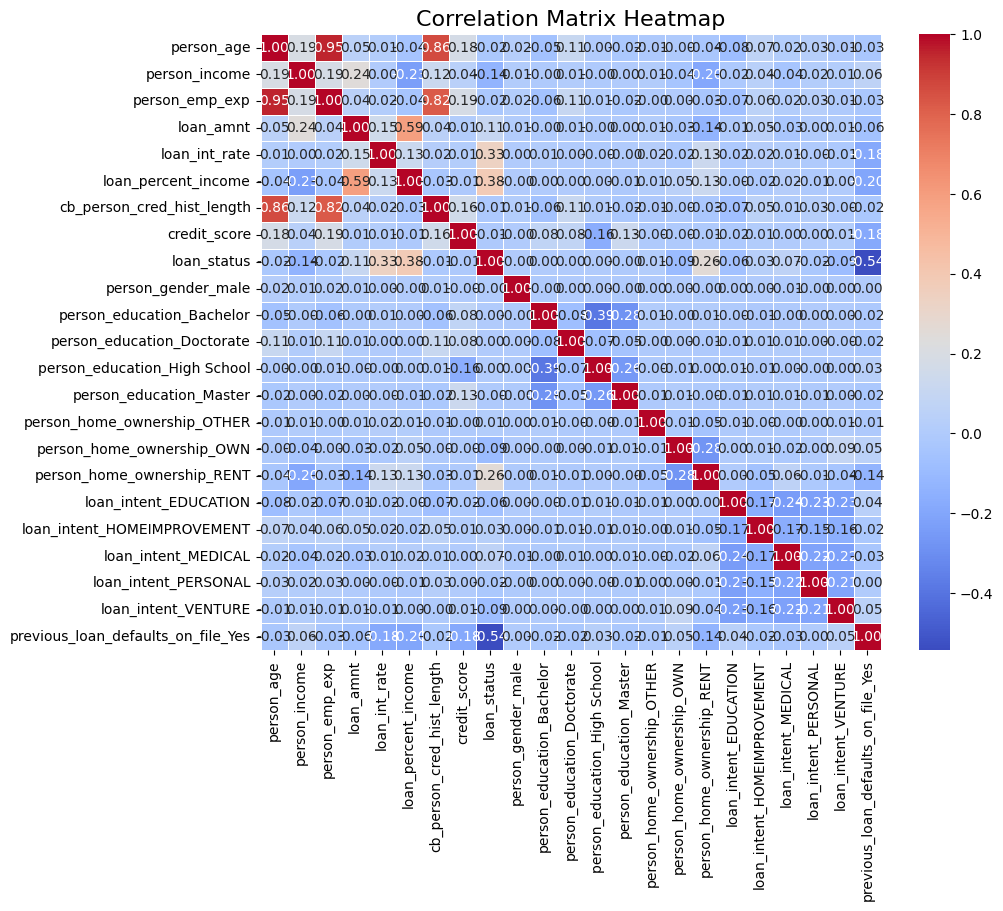

In [18]:
df = pd.read_csv("loan_data.csv")
df = pd.get_dummies(df, drop_first=True)
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.show()

Видим, что информация о возрасте человека person_age попарно сильно связаны с cb_person_cred_hist_length (длина кредитной истории в годах) и person_emp_exp (годы трудового стажа). Попробуем убрать одно из полей.

In [39]:
X_fin = X_scaled.drop('person_emp_exp', axis=1)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_fin, y, test_size=0.3, random_state=42)

# обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Оценим качество модели по метрикам для линейной регрессии:

In [41]:
features = X_test
y_pred = model.predict(features)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Absolute Percentage Error (%): {mape}')
print(f'R² Score: {r2}')

Mean Squared Error: 7.5654336094179415
Mean Absolute Error: 2.2447992731334225
Mean Absolute Percentage Error (%): 0.22915606786778514
R² Score: 0.13928520034531822


In [25]:
df = pd.DataFrame(y_test.copy())
df['prediction'] = y_pred
df.head(10)

,loan_int_rate,prediction
37979,6.04,10.150694
9911,11.49,10.556527
43386,14.88,12.782232
13822,13.99,10.447196
44810,15.41,12.633627
18495,5.79,10.326134
25555,12.42,11.188821
13316,16.29,12.965824
12929,11.11,12.762574
28374,12.99,10.495551


####Вывод:
Для лин. регрессии избавление от коррелирующих признаков на данном датасете привело к ухудшению результата.

###Логистическая регрессия (классификация)

####Baseline:

In [ ]:
# one-hot encoding
df = pd.read_csv("loan_data.csv")
df = pd.get_dummies(df, drop_first=True)
target = 'loan_status'
X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
model = LogisticRegression()
# обучим нашу модель
model.fit(X_train, y_train)
# выполним предсказание класса на тестовой выборке
y_pred = model.predict(X_test)

Accuracy : 84.18518518518519
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90     10493
           1       0.71      0.50      0.58      3007

    accuracy                           0.84     13500
   macro avg       0.79      0.72      0.74     13500
weighted avg       0.83      0.84      0.83     13500



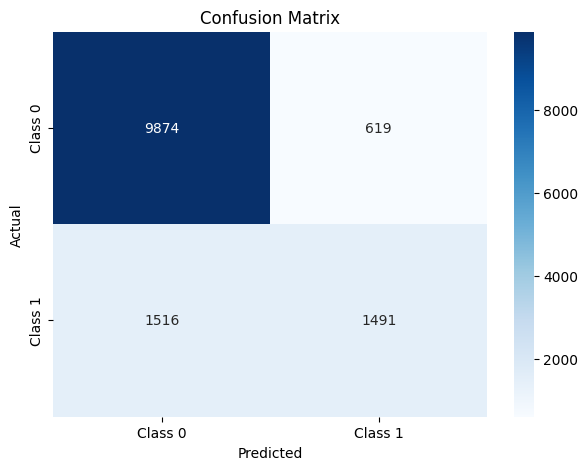

In [ ]:
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy : {acc * 100}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Draw confusion matrix
# Loan approval status: 1 = approved; 0 = rejected
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

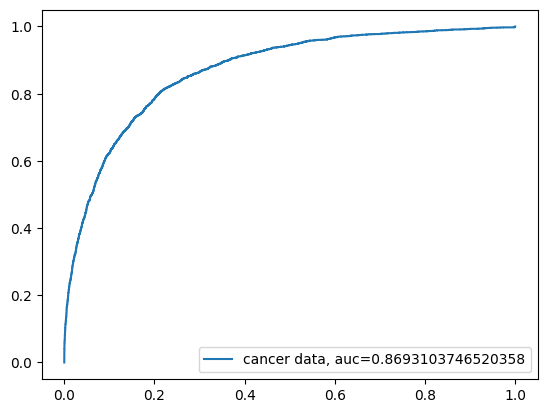

In [ ]:
# ROC curve
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="cancer data, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Как видим, модель хорошо предсказывает отклонение заявки на займ (класс 0), и плохо - одобрение. В целом, это неплохой результат, так как финансовым организациям важнее знать, когда займ одобрять бессмысленно и рискованно. С точки зрения риска для организации лучше отклонить заявку, чем одобрить и обнаружить, что заемщик не способен выплатить долг. По этой причине в метриках нам важнее полнота, recall.

####Улучшенный бейзлайн

In [ ]:
# one-hot encoding
df = pd.read_csv("loan_data.csv")
df = pd.get_dummies(df, drop_first=True)
target = 'loan_status'
X = df.drop(columns=[target])
y = df[target]

Гипотеза 1: исключение коррелирующих данных улучшит эффективность модели

Построим матрицу корреляций полей данных:

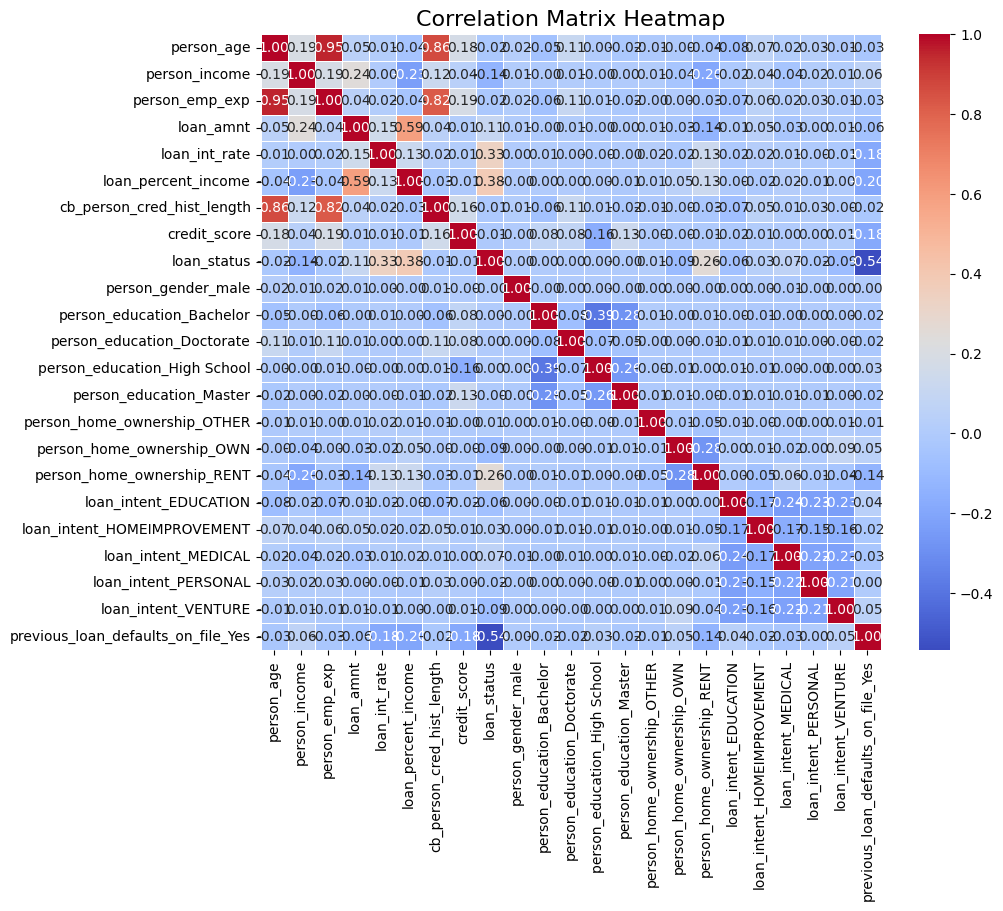

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.show()

Видим, что информация о возрасте человека person_age попарно сильно связаны с cb_person_cred_hist_length (длина кредитной истории в годах) и person_emp_exp (годы трудового стажа). Попробуем убрать одно из полей.

In [ ]:
df = pd.get_dummies(df, drop_first=True) # one-hot
X = df.drop(['loan_status', 'person_age'], axis=1)
y = df['loan_status']

Гипотеза 2. Необходимо нормализовать данные

In [ ]:
# приведем все независимые переменные к единому масштабу (нормализуем)
scaler = StandardScaler()
# приведем данные к единому масштабу
scaled_data = scaler.fit_transform(X)

# преобразуем scaled_data обратно в датафрейм
X_scaled = pd.DataFrame(scaled_data, columns = X.columns.values)

# посмотрим на результат
X_scaled.head()

,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,person_gender_male,person_education_Bachelor,person_education_Doctorate,...,person_education_Master,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_Yes
0,-0.104090,-0.892284,4.024953,1.683039,4.016394,-0.739109,-1.419814,-1.110069,-0.651157,-0.118292,...,2.333879,-0.051057,-0.264915,0.958931,-0.505307,-0.344862,-0.484252,2.226811,-0.45858,-1.016040
1,-0.846005,-0.892284,-1.359209,0.044782,-0.684829,-0.996863,-2.549975,-1.110069,-0.651157,-0.118292,...,-0.428471,-0.051057,3.774794,-1.042827,1.978995,-0.344862,-0.484252,-0.449073,-0.45858,0.984213
2,-0.844065,-0.397517,-0.646600,0.625557,3.443074,-0.739109,0.047412,-1.110069,-0.651157,-0.118292,...,-0.428471,-0.051057,-0.264915,-1.042827,-0.505307,-0.344862,2.065040,-0.449073,-0.45858,-1.016040
3,-0.007039,-0.892284,4.024953,1.417829,3.443074,-0.996863,0.840507,-1.110069,1.535728,-0.118292,...,-0.428471,-0.051057,-0.264915,0.958931,-0.505307,-0.344862,2.065040,-0.449073,-0.45858,-1.016040
4,-0.176371,-0.727362,4.024953,1.095549,4.475050,-0.481354,-0.924130,0.900845,-0.651157,-0.118292,...,2.333879,-0.051057,-0.264915,0.958931,-0.505307,-0.344862,2.065040,-0.449073,-0.45858,-1.016040


In [ ]:
# разобьем на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 42)

In [ ]:
model_new = LogisticRegression()
# обучим нашу модель
model_new.fit(X_train, y_train)
# выполним предсказание класса на тестовой выборке
y_pred = model_new.predict(X_test)

Accuracy : 89.3851851851852
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93     10493
           1       0.77      0.75      0.76      3007

    accuracy                           0.89     13500
   macro avg       0.85      0.84      0.85     13500
weighted avg       0.89      0.89      0.89     13500



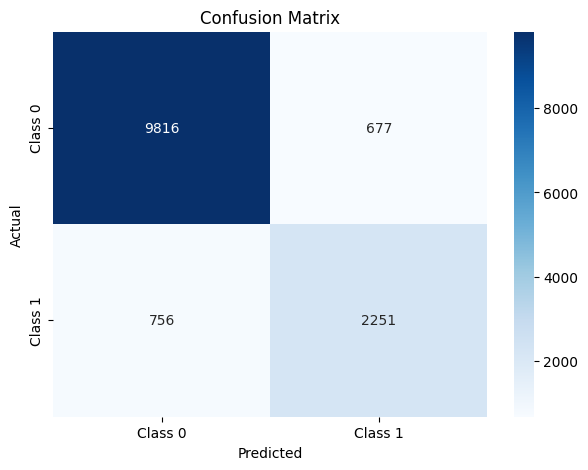

In [ ]:
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy : {acc * 100}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Cal confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Draw confusion matrix
# Loan approval status: 1 = approved; 0 = rejected
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

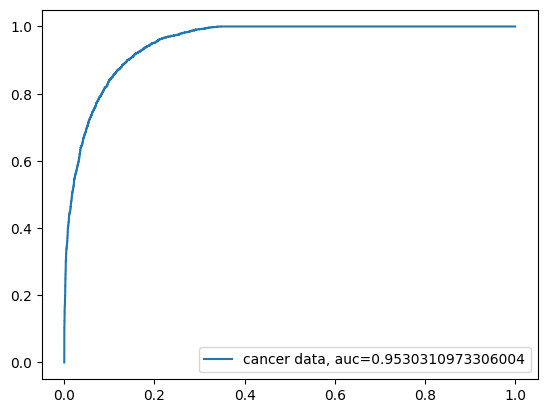

In [ ]:
# ROC curve
y_pred_proba = model_new.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="cancer data, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Видим, что точность модели для класса 1 (займ одобрен) заметно повысилась, а для класса 0 немного повысилась, согласно всем метрикам.

#####как должна выглядеть ROC-кривая

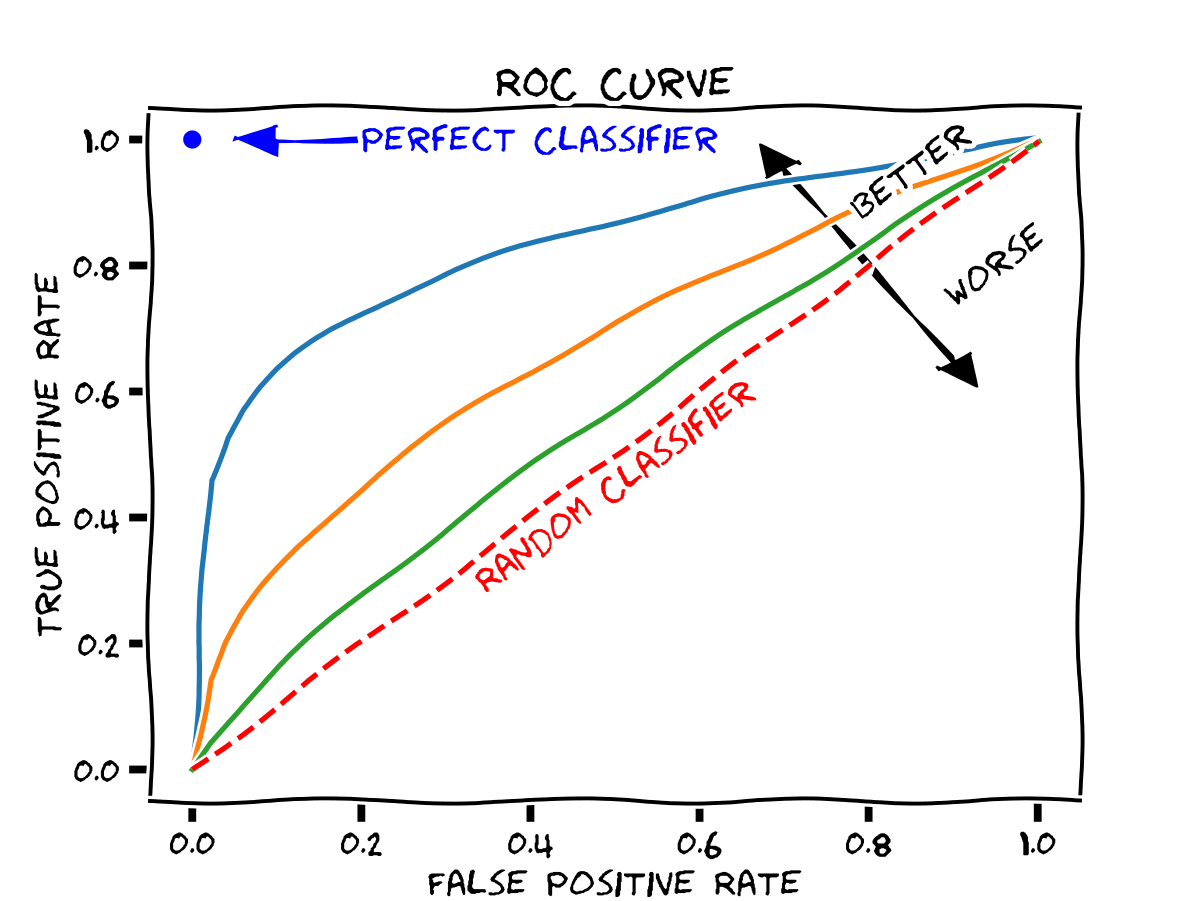

#####Гипотеза 3. Изменение гиперпараметров

In [ ]:
param_grid = [
    {'penalty':['l1','l2','elasticnet','none'],
    'C' : np.logspace(-4,4,20),
    'solver': ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter'  : [100,1000,2500,5000]
}
]
clf = GridSearchCV(model_new,param_grid = param_grid, cv = 3, verbose=True,n_jobs=-1)

In [ ]:
best_clf = clf.fit(X_scaled, y)

y_pred = best_clf.predict(X_test)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


Не удалось добиться результатов за приемлемое время.

####Вывод:
Учитывая, насколько значительно избавление от коррелирующих переменных улучшило модель, это является для данной модели классификации очень важным фактором.

###Самостоятельная имплементация

####Линейная регрессия

In [56]:
class CustomLinearRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Градиентный спуск
        for _ in range(self.n_iterations):
            y_predicted = np.dot(X, self.weights) + self.bias

            # Градиенты
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Обновление весов и смещения
            self.weights = self.weights - self.learning_rate * dw
            self.bias = self.bias - self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

In [67]:
df = pd.read_csv("loan_data.csv")

# one-hot encoding
df = pd.get_dummies(df, drop_first=True)
target = 'loan_int_rate'
X = df.drop(columns=[target])
y = df[target]

# приведем все независимые переменные к единому масштабу (нормализуем)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
X_scaled = pd.DataFrame(scaled_data, columns = X.columns.values)

Код без нормализации данных возвращал ошибочный результат. Думаю, это связано с накоплением ошибок из-за разных порядков значений переменных.

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# обучение модели линейной регрессии
model = CustomLinearRegression()
model.fit(X_train, y_train)

features = X_test
y_pred = model.predict(features)

Оценим качество модели по метрикам для линейной регрессии:

In [70]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Absolute Percentage Error (%): {mape}')
print(f'R² Score: {r2}')

Mean Squared Error: 7.568221742050612
Mean Absolute Error: 2.244191914271063
Mean Absolute Percentage Error (%): 0.22912040044386103
R² Score: 0.13896799618436273


Улучшение baseline:

In [61]:
df = pd.read_csv("loan_data.csv")

# one-hot encoding
df = pd.get_dummies(df, drop_first=True)
target = 'loan_int_rate'
X = df.drop(columns=[target])
y = df[target]

In [62]:
# приведем все независимые переменные к единому масштабу (нормализуем)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
X_scaled = pd.DataFrame(scaled_data, columns = X.columns.values)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# обучение модели линейной регрессии
model = CustomLinearRegression()
model.fit(X_train, y_train)

features = X_test
y_pred = model.predict(features)

In [64]:
from itertools import product
# Настройка гиперпараметров для линейной регрессии
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_iterations': [500, 1000, 2000]
}

best_score = float('inf')
best_params = None

for learning_rate, n_iterations in product(param_grid['learning_rate'], param_grid['n_iterations']):
    custom_lr = CustomLinearRegression(learning_rate=learning_rate, n_iterations=n_iterations)
    custom_lr.fit(X_train, y_train)
    y_pred = custom_lr.predict(X_test)
    score = mean_absolute_error(y_test, y_pred)
    if score < best_score:
        best_score = score
        best_params = {'learning_rate': learning_rate, 'n_iterations': n_iterations}
print("Лучшие параметры:", best_params)

Лучшие параметры: {'learning_rate': 0.1, 'n_iterations': 2000}


In [65]:
# Обучение
my_lreg = CustomLinearRegression(**best_params)
my_lreg.fit(X_train, y_train)
y_pred = my_lreg.predict(X_test)

In [66]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Absolute Percentage Error (%): {mape}')
print(f'R² Score: {r2}')

Mean Squared Error: 7.564660442944146
Mean Absolute Error: 2.2439566659648507
Mean Absolute Percentage Error (%): 0.22908680026749223
R² Score: 0.13937316302676506


####Логистическая регрессия (классификация)

In [72]:
class CustomLogisticRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        # Добавляем единичный столбец для учета смещения (bias)
        self.X = np.hstack((np.ones((X.shape[0], 1)), X))
        self.y = y
        self.weights = np.zeros(self.X.shape[1])  # Инициализация весов

        # Градиентный спуск
        for _ in range(self.n_iterations):
            z = np.dot(self.X, self.weights)
            predictions = self.sigmoid(z)
            gradient = np.dot(self.X.T, (predictions - self.y)) / self.y.size
            self.weights -= self.learning_rate * gradient  # Обновление весов

    def predict(self, X):
        # Добавляем единичный столбец для учета смещения (bias)
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        z = np.dot(X, self.weights)
        probabilities = self.sigmoid(z)
        return (probabilities >= 0.5).astype(int)

In [88]:
# one-hot encoding
df = pd.read_csv("loan_data.csv")
df = pd.get_dummies(df, drop_first=True)
target = 'loan_status'
X = df.drop(columns=[target])
y = df[target]

Нормализация необходима, т.к. происходит накопление ошибки

In [89]:
# нормализация данных
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

X_scaled = pd.DataFrame(scaled_data, columns = X.columns.values)

In [90]:
# разобьем на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 42)

In [91]:
my_logreg = CustomLogisticRegression(learning_rate=0.01, n_iterations=1000)
my_logreg.fit(X_train, y_train)
y_pred = my_logreg.predict(X_test)

Accuracy : 88.94814814814815
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     10493
           1       0.75      0.75      0.75      3007

    accuracy                           0.89     13500
   macro avg       0.84      0.84      0.84     13500
weighted avg       0.89      0.89      0.89     13500



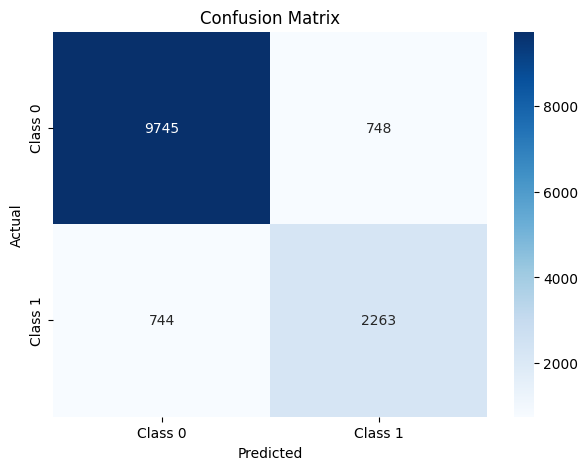

In [92]:
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy : {acc * 100}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Draw confusion matrix
# Loan approval status: 1 = approved; 0 = rejected
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Улучшение baseline:

In [109]:
df = pd.read_csv("loan_data.csv")
# one-hot encoding
df = pd.get_dummies(df, drop_first=True)
target = 'loan_status'
X = df.drop(columns=[target])
y = df[target]

In [110]:
# избавляемся от корреляции
df = pd.get_dummies(df, drop_first=True) # one-hot
X = df.drop(['loan_status', 'person_age'], axis=1)
y = df['loan_status']

In [111]:
# нормализация данных
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

X_scaled = pd.DataFrame(scaled_data, columns = X.columns.values)

In [112]:
# разобьем на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 42)

Обучаем и предсказываем:

In [113]:
my_logreg = CustomLogisticRegression(learning_rate=0.01, n_iterations=1000)
my_logreg.fit(X_train, y_train)
y_pred = my_logreg.predict(X_test)

Accuracy : 88.94814814814815
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     10493
           1       0.75      0.75      0.75      3007

    accuracy                           0.89     13500
   macro avg       0.84      0.84      0.84     13500
weighted avg       0.89      0.89      0.89     13500



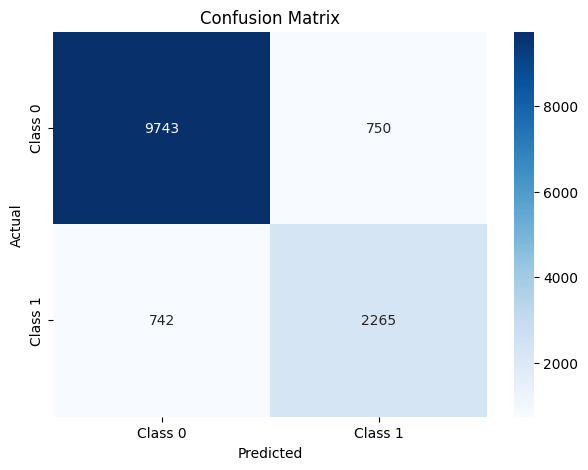

In [114]:
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy : {acc * 100}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Draw confusion matrix
# Loan approval status: 1 = approved; 0 = rejected
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

###Вывод:
Удалось добиться того, что результаты встроенных линейной и логистич. регрессии и самостоятельно реализованных практически идентичны, различаются во 2-3 знаках после запятой для значений метрик.
В самостоятельной реализации линейной регрессии также заметны некоторые улучшения метрик точности моделей при улучшении бейзлайна. Для логистической регрессии статистически значимых улучшений не было.